In [ ]:
                                            SUPPORT VECTOR MACHINE ASSIGNMENT

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
print(df.head())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [3]:
print(df.shape)

(2000, 26)


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
print(df.describe())

        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054


In [7]:
print(df.describe(include=['object', 'category']))

       cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count       2000        2000      2000    2000  2000            2000   
unique         5           4         9       2     9               4   
top       sunken       scaly     brown     yes  foul            free   
freq         439         568       263    1023   274             540   

       gill_spacing gill_size gill_color stalk_shape  ...  \
count          2000      2000       2000        2000  ...   
unique            3         2         12           2  ...   
top         distant    narrow     orange   enlarging  ...   
freq            677      1007        216        1040  ...   

       stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
count                    2000                   2000       2000       2000   
unique                      9                      9          2          4   
top                     brown                 orange  universal      white   
freq                 

In [8]:
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [9]:
print(df.duplicated().sum())

1024


In [10]:
#categorical column
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())

cap_shape: 5 unique values
['sunken' 'flat' 'bell' 'convex' 'conical']
cap_surface: 4 unique values
['scaly' 'fibrous' 'grooves' 'smooth']
cap_color: 9 unique values
['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
bruises: 2 unique values
['no' 'yes']
odor: 9 unique values
['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
gill_attachment: 4 unique values
['descending' 'notched' 'free' 'attached']
gill_spacing: 3 unique values
['distant' 'crowded' 'close']
gill_size: 2 unique values
['broad' 'narrow']
gill_color: 12 unique values
['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']
stalk_shape: 2 unique values
['tapering' 'enlarging']
stalk_root: 7 unique values
['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']
stalk_surface_above_ring: 4 unique values
['smooth' 'silky' 'scaly' 'fibrous']
stalk_surface_below_ring: 4 unique values
['silky' 'scaly' 'smooth' 'fibrous']
stalk_

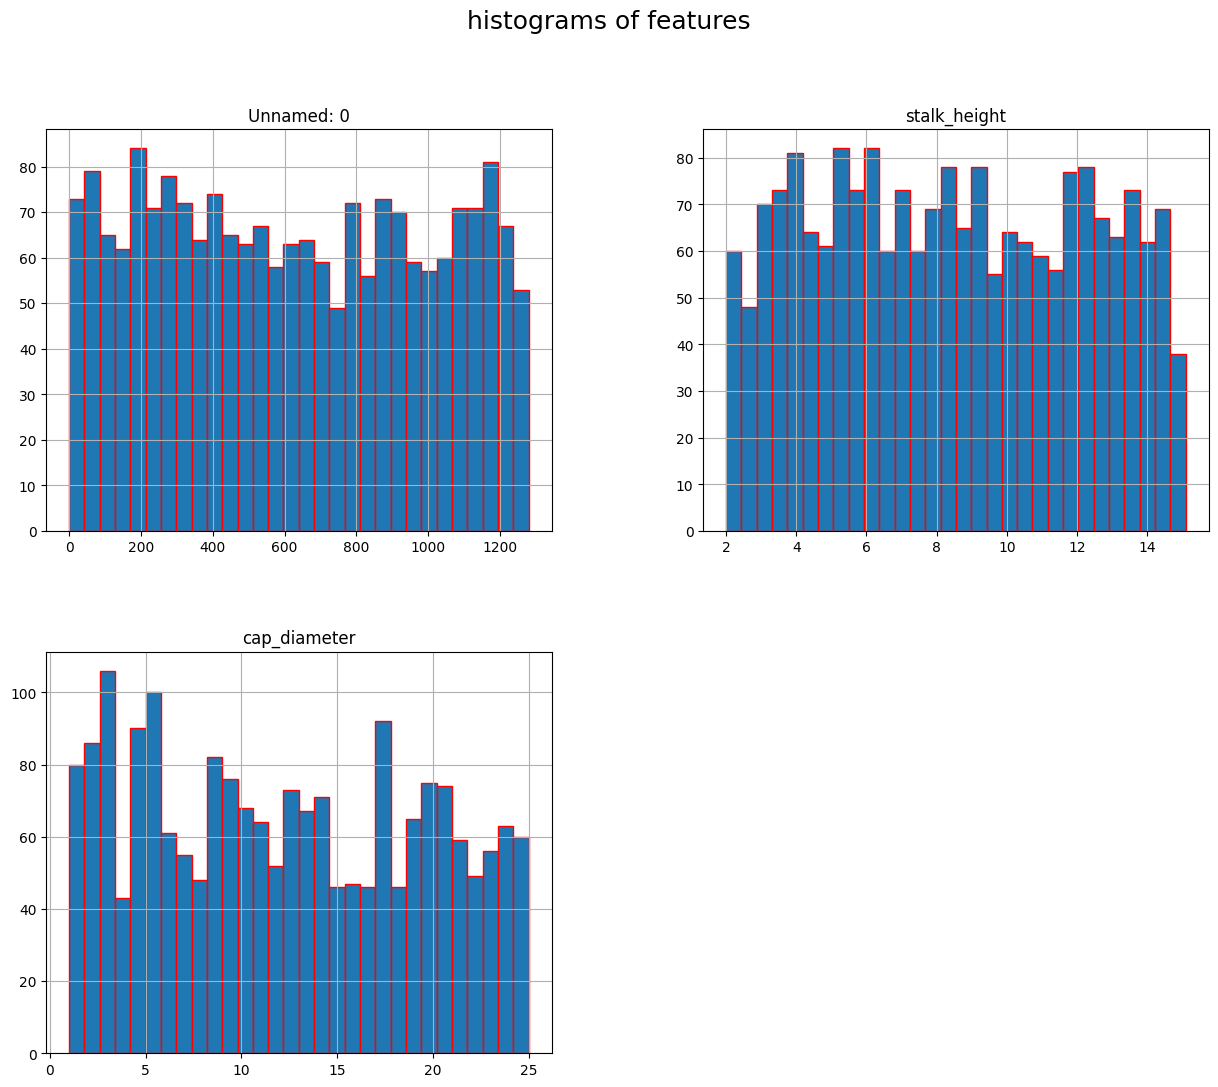

In [11]:
#histogram
df.hist(bins=30, figsize=(15, 12),edgecolor='red')
plt.suptitle("histograms of features", fontsize=18)
plt.show()

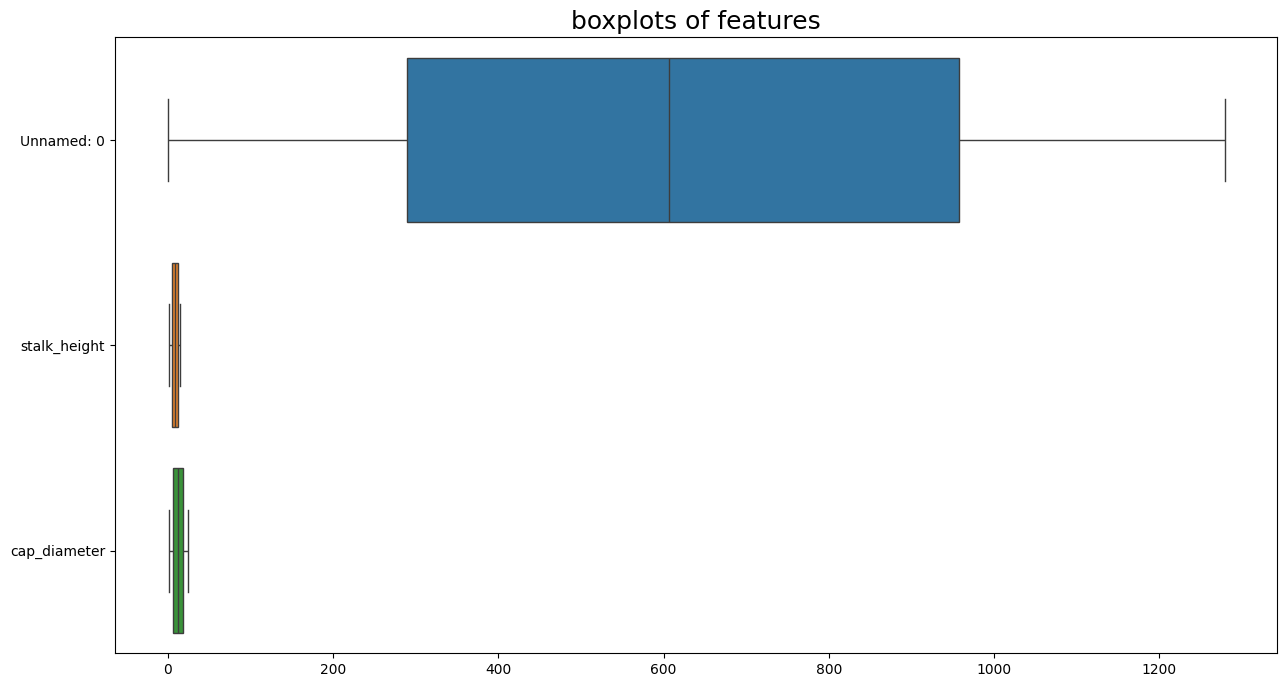

In [12]:
#boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h")
plt.title("boxplots of features", fontsize=18)
plt.show()

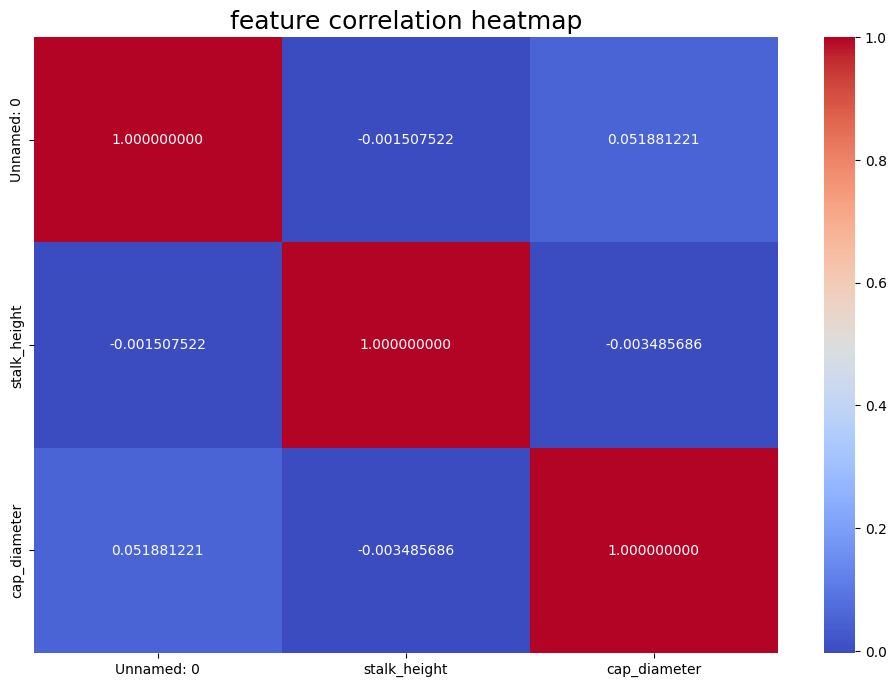

In [36]:
# investigate feature correlation
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".9f", cmap="coolwarm", cbar=True)
plt.title("feature correlation heatmap", fontsize=18)
plt.show()               
               

In [13]:
# Data processing
print("After Encoding:")
print(df.head())
print(df.info())

# features (X) and target (y) 
X = df.drop("class", axis=1)
y = df["class"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


After Encoding:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color pop

C:\Users\ridhv\AppData\Local\Temp\ipykernel_23228\1924781353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="Set2", legend=False)


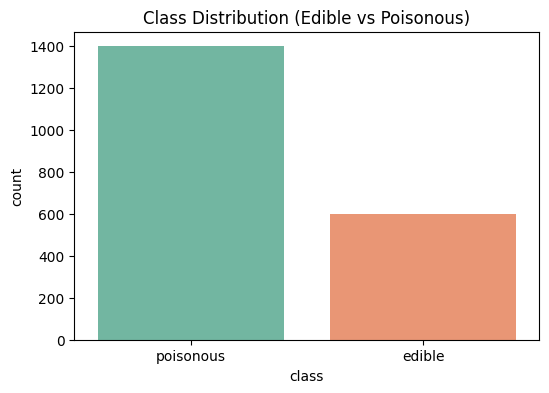

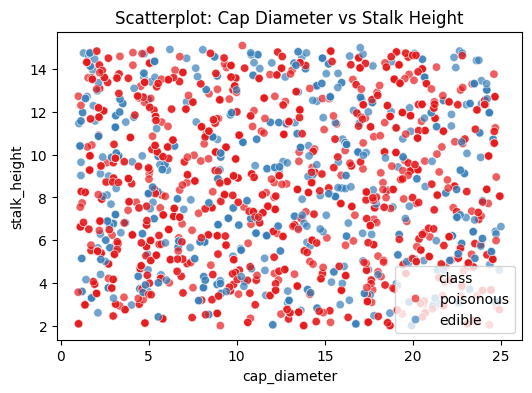

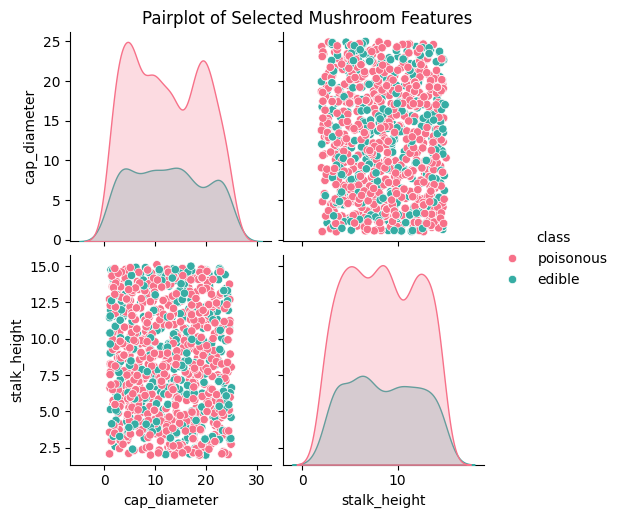

In [6]:
#data visualization
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=df, palette="Set2", legend=False)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

#  Scatterplot 
plt.figure(figsize=(6, 4))
sns.scatterplot(x="cap_diameter", y="stalk_height", hue="class", data=df, palette="Set1", alpha=0.7)
plt.title("Scatterplot: Cap Diameter vs Stalk Height")
plt.show()

# 3. Pairplot 
subset_cols = ["cap_shape", "cap_surface", "odor", "cap_diameter", "stalk_height", "class"]
sns.pairplot(df[subset_cols], hue="class", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Selected Mushroom Features", y=1.02)
plt.show()

Model Performance:
✅ Accuracy  : 0.7025
✅ Precision : 0.7018
✅ Recall    : 1.0000
✅ F1-score  : 0.8247

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.85      0.50      0.42       400
weighted avg       0.79      0.70      0.58       400



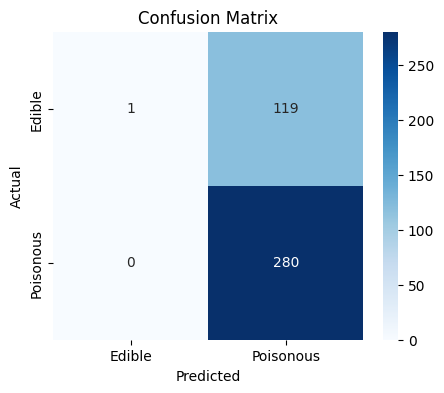

In [3]:
#svm implementation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")  
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")

print("Model Performance:")
print(f"✅ Accuracy  : {accuracy:.4f}")
print(f"✅ Precision : {precision:.4f}")
print(f"✅ Recall    : {recall:.4f}")
print(f"✅ F1-score  : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible","Poisonous"], yticklabels=["Edible","Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


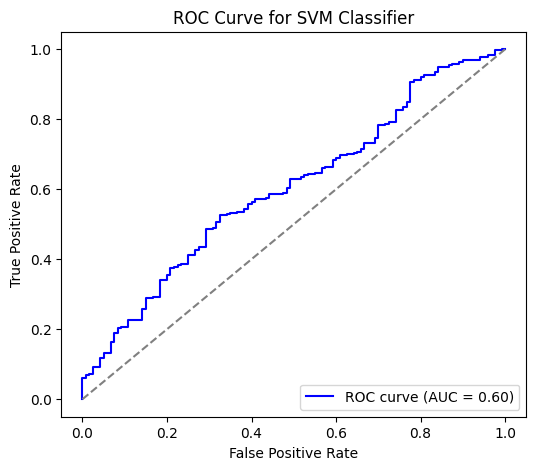

In [4]:
#visualization of svm results
from sklearn.metrics import roc_curve, auc

# Decision function gives continuous scores
y_scores = svm_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Classifier")
plt.legend(loc="lower right")
plt.show()


In [ ]:
#parameter tuning and optimization
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("mushroom.csv")

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Features and target
X = df.drop("class", axis=1)
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]   # Only used for 'poly'
}

svm = SVC(random_state=42)

grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=5,               
    scoring="accuracy", 
    n_jobs=-1,          
    verbose=2
)

grid_search.fit(X_train, y_train)

# ---------------------------
# Results
# ---------------------------
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [14]:
#comparasion and analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv("mushroom.csv")

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Features and target
X = df.drop("class", axis=1)
y = df["class"]
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


# Compare kernels

kernels = ["linear", "rbf", "poly"]
results = []

for kernel in kernels:
    if kernel == "linear":
        
        svm = LinearSVC(max_iter=5000, random_state=42)
    else:
        svm = SVC(kernel=kernel, C=1, gamma="scale", degree=2, random_state=42)

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")

    results.append({
        "Kernel": kernel,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
results_df = pd.DataFrame(results)
print(results_df)


   Kernel  Accuracy  Precision    Recall  F1-Score
0  linear    0.6975   0.699248  0.996429  0.821797
1     rbf    0.7000   0.700000  1.000000  0.823529
2    poly    0.7000   0.700000  1.000000  0.823529


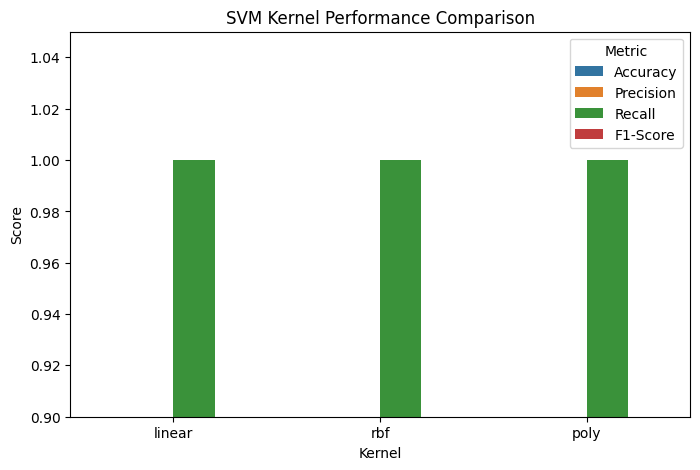

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars="Kernel", 
                                 value_vars=["Accuracy","Precision","Recall","F1-Score"]),
            x="Kernel", y="value", hue="variable")

plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.05)  
plt.legend(title="Metric")
plt.show()


In [19]:
# --- Define kernels & hyperparameters ---
kernels = [
    ("linear", {"C": 1}),
    ("rbf", {"C": 1, "gamma": 0.1}),
    ("poly", {"C": 1, "degree": 3, "gamma": "scale"})
]


In [20]:
for kernel, params in kernels:
    print(f"\n==================== {kernel.upper()} Kernel ====================")
    clf = SVC(kernel=kernel, **params)
    ...



==================== LINEAR Kernel ====================

==================== RBF Kernel ====================

==================== POLY Kernel ====================



==================== LINEAR Kernel ====================
Model Performance (5-fold CV):
✅ Accuracy  : 0.6970
✅ Precision : 0.7019
✅ Recall    : 0.9857
✅ F1-score  : 0.8200

Classification Report:
              precision    recall  f1-score   support

      edible       0.41      0.02      0.04       600
   poisonous       0.70      0.99      0.82      1400

    accuracy                           0.70      2000
   macro avg       0.56      0.50      0.43      2000
weighted avg       0.61      0.70      0.59      2000



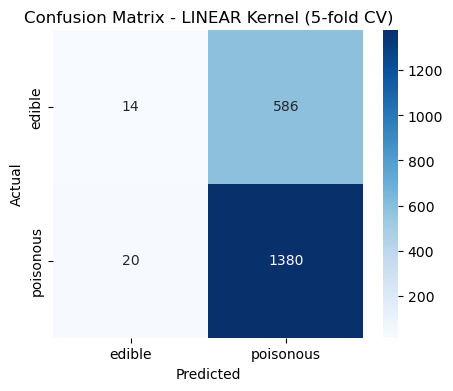


==================== RBF Kernel ====================
Model Performance (5-fold CV):
✅ Accuracy  : 0.8815
✅ Precision : 0.8552
✅ Recall    : 1.0000
✅ F1-score  : 0.9220

Classification Report:
              precision    recall  f1-score   support

      edible       1.00      0.60      0.75       600
   poisonous       0.86      1.00      0.92      1400

    accuracy                           0.88      2000
   macro avg       0.93      0.80      0.84      2000
weighted avg       0.90      0.88      0.87      2000



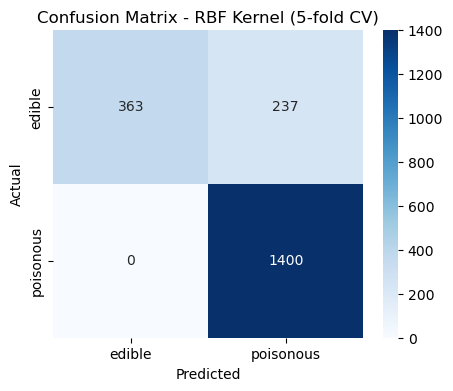


==================== POLY Kernel ====================
Model Performance (5-fold CV):
✅ Accuracy  : 0.7035
✅ Precision : 0.7025
✅ Recall    : 1.0000
✅ F1-score  : 0.8252

Classification Report:
              precision    recall  f1-score   support

      edible       1.00      0.01      0.02       600
   poisonous       0.70      1.00      0.83      1400

    accuracy                           0.70      2000
   macro avg       0.85      0.51      0.42      2000
weighted avg       0.79      0.70      0.58      2000



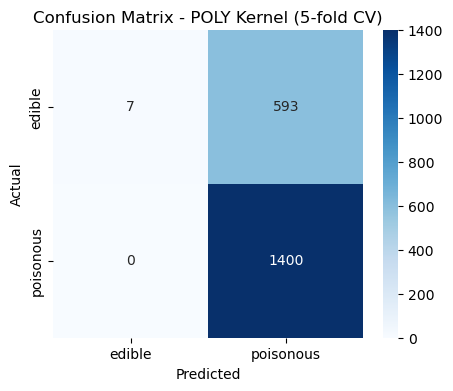

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
df = pd.read_csv("mushroom.csv")
X = df.drop(["Unnamed: 0", "class"], axis=1)
y = df["class"]

# One-hot encoding
X = pd.get_dummies(X)

#  kernels & hyperparameters
kernels = [
    ("linear", {"C": 1}),
    ("rbf", {"C": 1, "gamma": 0.1}),
    ("poly", {"C": 1, "degree": 3, "gamma": "scale"})
]

#  Cross-validation evaluation 
for kernel, params in kernels:
    print(f"\n==================== {kernel.upper()} Kernel ====================")
    
    clf = SVC(kernel=kernel, **params)
    y_pred = cross_val_predict(clf, X, y, cv=5)
    
    # Metrics
    accuracy  = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average="binary", pos_label="poisonous")
    recall    = recall_score(y, y_pred, average="binary", pos_label="poisonous")
    f1        = f1_score(y, y_pred, average="binary", pos_label="poisonous")
    
    print("Model Performance (5-fold CV):")
    print(f"✅ Accuracy  : {accuracy:.4f}")
    print(f"✅ Precision : {precision:.4f}")
    print(f"✅ Recall    : {recall:.4f}")
    print(f"✅ F1-score  : {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["edible","poisonous"],
                yticklabels=["edible","poisonous"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {kernel.upper()} Kernel (5-fold CV)")
    plt.show()
